**Team:**

  MaoLin Wei   21217009

  YongHeng Yin 21147469

  GuiYang Fan  21147418


Code can execute to the end without an error.



**Dataset from:**

  https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

**Third party code:**

https://www.kaggle.com/code/utkarshsaxenadn/weather-classification-resnet-acc-91

https://www.kaggle.com/code/iganarendra/using-alexnet-via-tensorflow

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://www.tensorflow.org/api_docs/python/tf/keras/applications

https://blog.csdn.net/u010397980/article/details/88088025

https://blog.csdn.net/liuz_notes/article/details/104293440?spm=1001.2101.3001.6661.1&utm_medium=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-104293440-blog-88088025.pc_relevant_multi_platform_whitelistv4&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-104293440-blog-88088025.pc_relevant_multi_platform_whitelistv4&utm_relevant_index=1

https://blog.csdn.net/liujingwei8610/article/details/123470276

https://mtyjkh.blog.csdn.net/article/details/117587326

# 1.Import Data

In [1]:
# Import data, data was stored in "/content/drive/My Drive/Colab Notebooks/Dataset", name as "./Multi-class Weather Dataset"
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Dataset
# Lists all files and folders in the path
!ls

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Dataset
 data7.csv    eye	       'Multi-class Weather Dataset'   SH600519.csv
 esport.txt  'kaggle_Dog&Cat'   resnet.h5


In [2]:
dataset = "./Multi-class Weather Dataset"

In [3]:
# Some of the packages that will be used later
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2.Data Pre-processing

In [4]:
# Classify the class of dataset
import os
class_names = sorted(os.listdir(dataset))
num_classes = len(class_names)
print(class_names,num_classes)

['Cloudy', 'Rain', 'Shine', 'Sunrise'] 4


In [5]:
# Check the number of different class
class_dis = [len(os.listdir(dataset + "/" + name)) for name in class_names]
class_dis

[300, 215, 253, 357]

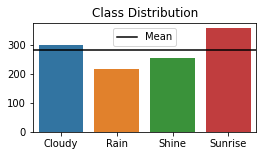

In [6]:
# Visualisation of the key attributes
# 1.Bar chart
plt.figure(figsize=(4,2)) # Adjust size
sns.barplot(
    x=class_names, 
    y=class_dis
)
plt.axhline(np.mean(class_dis), alpha=1, color='k', label="Mean") # alpha: the thickness of the line
plt.title("Class Distribution")
plt.legend() # Displays the content of the label
plt.show()

In [7]:
# 2.Pie chart
import plotly.express as px
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution",color_discrete_sequence=px.colors.sequential.Bluyl)
fig.update_traces(textposition='inside', textinfo='percent+label') # Display percentages and labels directly in each section of the pie chart
fig.update_layout({'title':{'x':0.5}}) # Center the title
fig.show()

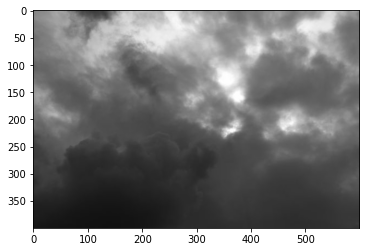

(1, 400, 600, 3)


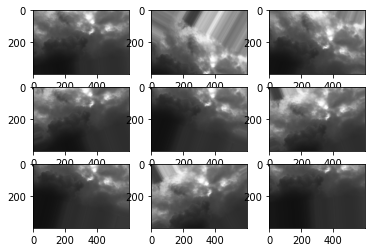

In [8]:
from __future__ import print_function
from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize
from keras_preprocessing.image import ImageDataGenerator

# Pre-process
def imgGen(img, zca=False, rotation=0., w_shift=0., h_shift=0., shear=0., zoom=0., h_flip=False, v_flip=False,  preprocess_fcn=None, batch_size=9):
    datagen = ImageDataGenerator(
            zca_whitening=zca,
            rotation_range=rotation,
            width_shift_range=w_shift,
            height_shift_range=h_shift,
            shear_range=shear,
            zoom_range=zoom,
            fill_mode='nearest',
            horizontal_flip=h_flip,
            vertical_flip=v_flip,
            preprocessing_function=preprocess_fcn,
          )
    
    datagen.fit(img)

    i=0
    for img_batch in datagen.flow(img, batch_size=9, shuffle=False):
        for img in img_batch:
            plt.subplot(330 + 1 + i)
            plt.imshow(img)
            i=i+1    
        if i >= batch_size:
            break
    plt.show()

# Visualize the original image
img = imread("./Multi-class Weather Dataset/Cloudy/cloudy1.jpg")
plt.imshow(img)
plt.show()

# Reshape raw images, ready for data enhancement
img = img.astype('float32')
img /= 255
h_dim = np.shape(img)[0]
w_dim = np.shape(img)[1]
num_channel = np.shape(img)[2]
img = img.reshape(1, h_dim, w_dim, num_channel)
print(img.shape)

# Data enhancement
imgGen(img, rotation=30, h_shift=0.5)



In [9]:
img_height,img_width = 90,90 # Setup the image size as 90,90

In [10]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( # Pre-process the image, including width,height,size...
    rescale = 1.0/255.,# Scale the dimensions
    rotation_range=90,# The image is rotated randomly by a certain angle, and the maximum rotation angle is the set value
    width_shift_range=0.2,# The image pans horizontally randomly, and the maximum pan value is the set value. If the value is less than 1 float value, it can be considered to be proportional translation, if greater than 1, the translation is pixels; If the value is integer, the translation is also pixels; Assuming a pixel of 2.0, the movement range is between [-1,1].
    height_shift_range=0.2,# Image randomly pans vertically, same as above
    shear_range=0.2,# Images are randomly trimmed
    zoom_range=0.3,# Images are randomly zoomed
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation.
    vertical_flip=True)# The image is randomly flipped vertically
train_generator = datagen.flow_from_directory( # Divide the dataset into tarin and valid
    dataset,
    batch_size=16, # Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).
    shuffle=True, # Whether to shuffle the data. Default: True.
    class_mode='categorical', # one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None. Default: "categorical". "categorical": 2D numpy array of one-hot encoded labels. Supports multi-label output.
    subset='training', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set. When subset="both", the utility returns a tuple of two datasets (the training and validation datasets respectively).
    target_size=(img_height,img_width))
valid_generator = datagen.flow_from_directory(
    dataset, 
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation',
    target_size=(img_height,img_width))
test_generator = datagen.flow_from_directory(
    dataset, 
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation',
    target_size=(img_height,img_width))

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


# 3.ResNet152V2 Model

In [11]:
# Matrix contents required when compile
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.AUC()
    ]

# Create a function that can generate the images
def acc_loss(history): 
  train_acc = history.history['accuracy'] # import the argument
  train_loss = history.history['loss']
  train_precision = history.history['precision']
  train_recall = history.history['recall']
  train_auc = history.history['auc']

  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  val_precision = history.history['val_precision']
  val_recall = history.history['val_recall']
  val_auc = history.history['val_auc']

  # 1.Loss and accuacy
  fig1 = plt.figure(figsize=(10, 4)) 
  plt.subplot(1, 2, 1) # row,column,number
  plt.plot(train_acc, label='Training')
  plt.plot(val_acc, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  
  plt.subplot(1, 2, 2) 
  plt.plot(train_loss, label='Training')
  plt.plot(val_loss, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show() # Show that a graph contains 2 subgraphs

  # 2.Precision, recall and AUC
  fig2 = plt.figure(figsize=(15, 4)) 
  plt.subplot(1, 3, 1) 
  plt.plot(train_precision, label='Training')
  plt.plot(val_precision, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Precision')
  plt.legend()

  plt.subplot(1, 3, 2) 
  plt.plot(train_recall, label='Training')
  plt.plot(val_recall, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Recall')
  plt.legend()

  plt.subplot(1, 3, 3) 
  plt.plot(train_auc, label='Training')
  plt.plot(val_auc, label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('AUC')
  plt.legend()
  plt.show() # Show that a graph contains 3 subgraphs

# Create a function that can generate the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
def prediction(model): 
  probabilities = model.predict(valid_generator)
  predictions = []
  for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
  labels = valid_generator.classes
  # tn,fp,fn,tp = confusion_matrix(labels, predictions).ravel()
  cm = confusion_matrix(labels, predictions) #[[tp, fp],[fn, tn]]
  cr = classification_report(labels, predictions)
  print(cr)
  cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names).plot()

## 3.1Original Model

In [12]:
from tensorflow.keras.applications import ResNet152V2
base_model = ResNet152V2(include_top=False, input_shape=(img_height,img_width,3)) # Choose the CNN structure ResNet152V2, and decide the input size of images
base_model.trainable = False

234545216/234545216 [==============================] - 8s 0us/step


In [13]:
model1=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3), # Base the ResNet152V2, we add some layers to make the result more precise
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])
model1.summary() # Check the model structue

from keras.optimizers import Adam
optimizer=Adam(lr=0.01, beta_1=0.5)
model1.compile(
    optimizer = optimizer, #'Adam'
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 3, 3, 2048)        58331648  
                                                                 
 dropout (Dropout)           (None, 3, 3, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 59,511,620
Trainable params: 1,179,972
Non-trainable params: 58,331,648
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
history1 = model1.fit( # Import the dataset to train the model
    train_generator,
    validation_data = valid_generator,
    epochs=100) 

Epoch 1/100
57/57 [==============================] - 407s 7s/step - loss: 2.2874 - accuracy: 0.7503 - precision: 0.7683 - recall: 0.7358 - auc: 0.8874 - val_loss: 0.9174 - val_accuracy: 0.7188 - val_precision: 0.7586 - val_recall: 0.6875 - val_auc: 0.9193
Epoch 2/100
57/57 [==============================] - 52s 909ms/step - loss: 0.7661 - accuracy: 0.8135 - precision: 0.8390 - recall: 0.7925 - auc: 0.9444 - val_loss: 1.3392 - val_accuracy: 0.7500 - val_precision: 0.7512 - val_recall: 0.7277 - val_auc: 0.9016
Epoch 3/100
57/57 [==============================] - 51s 900ms/step - loss: 0.6795 - accuracy: 0.8579 - precision: 0.8647 - recall: 0.8368 - auc: 0.9599 - val_loss: 0.6958 - val_accuracy: 0.7812 - val_precision: 0.8086 - val_recall: 0.7545 - val_auc: 0.9435
Epoch 4/100
57/57 [==============================] - 55s 956ms/step - loss: 0.8239 - accuracy: 0.8257 - precision: 0.8499 - recall: 0.7669 - auc: 0.9416 - val_loss: 0.9931 - val_accuracy: 0.7321 - val_precision: 0.7979 - val_rec

In [ ]:
acc_loss(history1) # Plot the image
prediction(model1)

In [ ]:
# Evaluate the CNN Model
import pandas as pd

probabilities = model1.predict(valid_generator)
predictions = []
for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
#confusion_matrix(valid_generator.classes, predictions)

# Kappa coefficient is the model evaluation parameter obtained based on the calculation of confusion matrix (the better to close 1).
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

Kappa_confficient = kappa_cal(confusion_matrix(valid_generator.classes, predictions))
print("Kappa Confficient: ", Kappa_confficient)

# Hamming distance （the better to close 0)
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(valid_generator.classes, predictions)
print("Hamming Distance:  ", ham_distance)

from sklearn.metrics import jaccard_score
# Jaccard coefficient (the better to close 1)
# Because the dataset is multiclassified, it needs to change the average parameter to micro instead of binary
# The original function is -> jaccard_similarity_score, but it is modified to jaccard_score in 2021
jaccrd_score = jaccard_score(valid_generator.classes, predictions,pos_label = "PAIDOFF",average='micro')
print("Jaccard_Index:     ", jaccrd_score)

## 3.2Turning the number of epochs during training

In [ ]:
model2=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])
model2.summary()
model2.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history2 = model2.fit(
    train_generator,
    validation_data = valid_generator,
    epochs=60) # Change the number of epochs, exploring the influence

In [ ]:
acc_loss(history2)
prediction(model2)

In [ ]:
# Evaluate the CNN Model
probabilities = model2.predict(valid_generator)
predictions = []
for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
#confusion_matrix(valid_generator.classes, predictions)

# Kappa coefficient is the model evaluation parameter obtained based on the calculation of confusion matrix (the better to close 1).
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

Kappa_confficient = kappa_cal(confusion_matrix(valid_generator.classes, predictions))
print("Kappa Confficient: ", Kappa_confficient)

# Hamming distance （the better to close 0)
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(valid_generator.classes, predictions)
print("Hamming Distance:  ", ham_distance)

from sklearn.metrics import jaccard_score
# Jaccard coefficient (the better to close 1)
# Because the dataset is multiclassified, it needs to change the average parameter to micro instead of binary
# The original function is -> jaccard_similarity_score, but it is modified to jaccard_score in 2021
jaccrd_score = jaccard_score(valid_generator.classes, predictions,pos_label = "PAIDOFF",average='micro')
print("Jaccard_Index:     ", jaccrd_score)

##3.3Turning the flatten layers in ResNet

In [ ]:
model3=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Flatten(), # Add anothe fatten layer, exporing the influence of flatten
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])
model3.summary()
model3.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history3 = model3.fit(
    train_generator,
    validation_data = valid_generator,
    epochs=30) 

In [ ]:
acc_loss(history3)
prediction(model3)

In [ ]:
# Evaluate the CNN Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd

probabilities = model3.predict(valid_generator)
predictions = []
for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
#confusion_matrix(valid_generator.classes, predictions)

# Kappa coefficient is the model evaluation parameter obtained based on the calculation of confusion matrix (the better to close 1).
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

Kappa_confficient = kappa_cal(confusion_matrix(valid_generator.classes, predictions))
print("Kappa Confficient: ", Kappa_confficient)

# Hamming distance （the better to close 0)
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(valid_generator.classes, predictions)
print("Hamming Distance:  ", ham_distance)

from sklearn.metrics import jaccard_score
# Jaccard coefficient (the better to close 1)
# Because the dataset is multiclassified, it needs to change the average parameter to micro instead of binary
# The original function is -> jaccard_similarity_score, but it is modified to jaccard_score in 2021
jaccrd_score = jaccard_score(valid_generator.classes, predictions,pos_label = "PAIDOFF",average='micro')
print("Jaccard_Index:     ", jaccrd_score)

## 3.4Turning the activation function of the dense layer

In [ ]:
model4=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='sigmoid'), # Change the activation function to explore the influence
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])
model4.summary()
model4.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history4 = model4.fit(
    train_generator,
    validation_data = valid_generator,
    epochs=30) 

In [ ]:
acc_loss(history4)
prediction(model4)

In [ ]:
# Evaluate the CNN Model
probabilities = model4.predict(valid_generator)
predictions = []
for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
#confusion_matrix(valid_generator.classes, predictions)

# Kappa coefficient is the model evaluation parameter obtained based on the calculation of confusion matrix (the better to close 1).
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

Kappa_confficient = kappa_cal(confusion_matrix(valid_generator.classes, predictions))
print("Kappa Confficient: ", Kappa_confficient)

# Hamming distance （the better to close 0)
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(valid_generator.classes, predictions)
print("Hamming Distance:  ", ham_distance)

from sklearn.metrics import jaccard_score
# Jaccard coefficient (the better to close 1)
# Because the dataset is multiclassified, it needs to change the average parameter to micro instead of binary
# The original function is -> jaccard_similarity_score, but it is modified to jaccard_score in 2021
jaccrd_score = jaccard_score(valid_generator.classes, predictions,pos_label = "PAIDOFF",average='micro')
print("Jaccard_Index:     ", jaccrd_score)

## 3.5Turning the optimiser of model

In [ ]:
model5=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3), # Base the ResNet152V2, we add some layers to make the result more precise
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])
model5.summary() # Check the model structue
model5.compile(
    optimizer = 'sgd', # Change the optimiser
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history5 = model5.fit( # Import the dataset to train the model
    train_generator,
    validation_data = valid_generator,
    epochs=30) 

In [ ]:
acc_loss(history5) # Plot the image
prediction(model5)

In [ ]:
# Evaluate the CNN Model
probabilities = model5.predict(valid_generator)
predictions = []
for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
#confusion_matrix(valid_generator.classes, predictions)

# Kappa coefficient is the model evaluation parameter obtained based on the calculation of confusion matrix (the better to close 1).
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

Kappa_confficient = kappa_cal(confusion_matrix(valid_generator.classes, predictions))
print("Kappa Confficient: ", Kappa_confficient)

# Hamming distance （the better to close 0)
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(valid_generator.classes, predictions)
print("Hamming Distance:  ", ham_distance)

from sklearn.metrics import jaccard_score
# Jaccard coefficient (the better to close 1)
# Because the dataset is multiclassified, it needs to change the average parameter to micro instead of binary
# The original function is -> jaccard_similarity_score, but it is modified to jaccard_score in 2021
jaccrd_score = jaccard_score(valid_generator.classes, predictions,pos_label = "PAIDOFF",average='micro')
print("Jaccard_Index:     ", jaccrd_score)

## 3.6Turning the Batch Normalisation layer of model

In [ ]:
model6=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3), # Base the ResNet152V2, we add some layers to make the result more precise
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])
model6.summary() # Check the model structue
model6.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history6 = model6.fit( # Import the dataset to train the model
    train_generator,
    validation_data = valid_generator,
    epochs=30) 

In [ ]:
acc_loss(history6) # Plot the image
prediction(model6)

In [ ]:
# Evaluate the CNN Model

probabilities = model6.predict(valid_generator)
predictions = []
for prob in probabilities:
    best_index = np.argmax(prob)
    predictions.append(best_index)
#confusion_matrix(valid_generator.classes, predictions)

# Kappa coefficient is the model evaluation parameter obtained based on the calculation of confusion matrix (the better to close 1).
def kappa_cal(matrix):
    n = np.sum(matrix)
    sum_po = 0
    sum_pe = 0
    for i in range(len(matrix[0])):
        sum_po += matrix[i][i]
        row = np.sum(matrix[i, :])
        col = np.sum(matrix[:, i])
        sum_pe += row * col
    po = sum_po / n
    pe = sum_pe / (n * n)
    # print(po, pe)
    return (po - pe) / (1 - pe)

Kappa_confficient = kappa_cal(confusion_matrix(valid_generator.classes, predictions))
print("Kappa Confficient: ", Kappa_confficient)

# Hamming distance （the better to close 0)
from sklearn.metrics import hamming_loss
ham_distance = hamming_loss(valid_generator.classes, predictions)
print("Hamming Distance:  ", ham_distance)

from sklearn.metrics import jaccard_score
# Jaccard coefficient (the better to close 1)
# Because the dataset is multiclassified, it needs to change the average parameter to micro instead of binary
# The original function is -> jaccard_similarity_score, but it is modified to jaccard_score in 2021
jaccrd_score = jaccard_score(valid_generator.classes, predictions,pos_label = "PAIDOFF",average='micro')
print("Jaccard_Index:     ", jaccrd_score)

# 4.Cross-folding verification

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( # Pre-process the image, including width,height,size...
    rescale = 1.0/255.,# Scale the dimensions
    rotation_range=90,# The image is rotated randomly by a certain angle, and the maximum rotation angle is the set value
    width_shift_range=0.2,# The image pans horizontally randomly, and the maximum pan value is the set value. If the value is less than 1 float value, it can be considered to be proportional translation, if greater than 1, the translation is pixels; If the value is integer, the translation is also pixels; Assuming a pixel of 2.0, the movement range is between [-1,1].
    height_shift_range=0.2,# Image randomly pans vertically, same as above
    shear_range=0.2,# Images are randomly trimmed
    zoom_range=0.3,# Images are randomly zoomed
    validation_split=0.5, # Optional float between 0 and 1, fraction of data to reserve for validation.
    vertical_flip=True)# The image is randomly flipped vertically
train_generator = datagen.flow_from_directory( # Divide the dataset into tarin and valid
    dataset,
    batch_size=16, # Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).
    shuffle=True,
    class_mode='categorical',
    subset='training', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set. When subset="both", the utility returns a tuple of two datasets (the training and validation datasets respectively).
    target_size=(img_height,img_width))
valid_generator = datagen.flow_from_directory(
    dataset, 
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation',
    target_size=(img_height,img_width))
test_generator = datagen.flow_from_directory(
    dataset, 
    batch_size=16,
    shuffle=True,
    class_mode='categorical',
    subset='validation',
    target_size=(img_height,img_width))

model1.summary()

model1.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

history7_1 = model1.fit( # Import the dataset to train the model
    train_generator,
    validation_data = valid_generator,
    epochs=30) 

acc_loss(history7_1) # Plot the image

model1.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

history7_2 = model1.fit( # Import the dataset to train the model
    valid_generator,
    validation_data = train_generator,
    epochs=30) 

acc_loss(history7_2) # Plot the image


# 5.Modify the overfit

## 5.1 Learning rate 

In [ ]:
model1.summary() # Check the model structue

from keras.optimizers import Adam
optimizer=Adam(lr=0.01, beta_1=0.5)
model1.compile(
    optimizer = optimizer, #'Adam'
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history1 = model1.fit( # Import the dataset to train the model
    train_generator,
    validation_data = valid_generator,
    epochs=100) 
acc_loss(history1) # Plot the image
prediction(model1)

## 5.2 Regularization


In [ ]:
model1=tf.keras.models.Sequential([
     base_model,
    tf.keras.layers.Dropout(0.3), # Base the ResNet152V2, we add some layers to make the result more precise
    tf.keras.layers.Flatten(),
    Dense(256, kernel_regularizer=keras.regularizers.l1(0.01)),
    '''
    Dense(256, kernel_regularizer=keras.regularizers.l1(0.01))
    Dense(256, kernel_regularizer=keras.regularizers.l2(0.01))
    Dense(256, kernel_regularizer=keras.regularizers.l1_l2(0.01))

    '''
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax') # num_classes
])

model1.summary() # Check the model structue

from keras.optimizers import Adam

model1.compile(
    optimizer = 'Adam', 
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = METRICS)

In [ ]:
history1 = model1.fit( # Import the dataset to train the model
    train_generator,
    validation_data = valid_generator,
    epochs=100) 
acc_loss(history1) # Plot the image
prediction(model1)